In [60]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from numba import njit

### Initial configuration

In [88]:
def get_iso_orientations(n, cfg='Iso3'):
    # Set all minus-ends to be at the origin [0,0,0]
    end0 = np.zeros((n,3))

    # Get plus-ends uniform-randomly on the surface of a sphere
    end1 = np.random.randn(n,3)
    if cfg == 'Iso2':
        end1[:,-1] = end0[:,-1]
    elif cfg == 'NemZ':
        end1[:,0] = end0[:,0]
        end1[:,1] = end0[:,1]
    orts = np.zeros_like(end1)
    for idx in np.arange( end1.shape[0]):
        xi = end1[idx,:]-end0[idx,:]
        orts[idx,:] = xi / np.linalg.norm(xi)
    return orts

# Plotting
def plot3(npts):
    phi = np.linspace(0, np.pi, 20)
    theta = np.linspace(0, 2 * np.pi, 40)
    x = np.outer(np.sin(theta), np.cos(phi))
    y = np.outer(np.sin(theta), np.sin(phi))
    z = np.outer(np.cos(theta), np.ones_like(phi))

    fig, ax = plt.subplots(1, 1, figsize=(8,6),subplot_kw={'projection':'3d'})
    ax.plot_wireframe( 
        x,y,z, color='k', rstride=1, cstride=1)
    ax.scatter(
        npts[:,0], npts[:,1], npts[:,2], 
        s=40, c='r', zorder=0)

### Nematic tensor

In [89]:
def calc_nematic_order(orient_array):
    # Calculates the maximum eigenvalue of the nematic tensor Q

    if not np.any( orient_array):
        return np.nan

    # calculate Q tensor
    Q = calc_nematic_tensor(orient_array)
    S = np.sqrt(np.tensordot(Q, Q)*1.5)
    return S

@njit
def calc_nematic_tensor( orient_array):
    # Calculates the nematic tensor Q

    # initialize Q tensor
    Q = np.zeros((3,3))
    # sum over all filaments, taking their outer products
    for irow in np.arange(orient_array.shape[0]):
        Q += np.outer( orient_array[irow,:], orient_array[irow,:])

    # complete mean calculation by dividing by number of filaments and subtracting identity.
    Q = Q/orient_array.shape[0] - np.identity(3)/3
    return Q

### Code:
#### Isotropic-3D:


Isotropic 3D:

Nematic Tensor Q:
 [[-0.00955157  0.01786938 -0.00331905]
 [ 0.01786938  0.0149983   0.00346581]
 [-0.00331905  0.00346581 -0.00544673]]

EigenVal <---> EigenVec :
0.0245 <---> [-0.46031156 -0.8862575  -0.05158409]
-0.0204 <---> [-0.84141674  0.45407425 -0.29297515]
-0.0041 <---> [-0.28307442  0.09145613  0.95472752]

Nematic order S = -0.008170096095531655


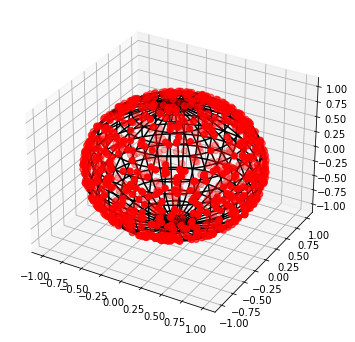

In [92]:
print('\nIsotropic 3D:\n')
# Orientations
orts = get_iso_orientations(1000,cfg='Iso3')
plot3(orts)

# Get nematic Q tensor
Q = calc_nematic_tensor(orts)
print('Nematic Tensor Q:\n {}\n'.format(Q))

# Get eigenvalues and eigenvectors
w,v = np.linalg.eig( Q)
print('EigenVal <---> EigenVec :')
for idx in np.arange(w.shape[0]):
    print('{0:1.4f} <---> {1}'.format(w[idx], v[:,idx]))
    
# Nematic order S
cosTheta = orts[:,-1] # theta is angle between z-axis and rod orientation
S = np.mean( (3/2)*(cosTheta**2 - (1/3)) )
print('\nNematic order S = {}'.format(S))

#### Isotropic 2D (no Z-component):


Isotropic Planar :

Nematic Tensor Q:
 [[ 0.15954446 -0.00478653  0.        ]
 [-0.00478653  0.17378887  0.        ]
 [ 0.          0.         -0.33333333]]

EigenVal <---> EigenVec :
0.1581 <---> [-0.95655102 -0.291565    0.        ]
0.1752 <---> [ 0.291565   -0.95655102  0.        ]
-0.3333 <---> [0. 0. 1.]

Nematic order S = -0.5


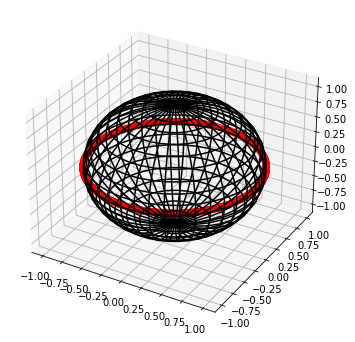

In [93]:
print('\nIsotropic Planar :\n')
# Orientations
orts = get_iso_orientations(1000,cfg='Iso2')
plot3(orts)


# Get nematic Q tensor
Q = calc_nematic_tensor(orts)
print('Nematic Tensor Q:\n {}\n'.format(Q))

# Get eigenvalues and eigenvectors
w,v = np.linalg.eig( Q)
print('EigenVal <---> EigenVec :')
for idx in np.arange(w.shape[0]):
    print('{0:1.4f} <---> {1}'.format(w[idx], v[:,idx]))

# Nematic order S
cosTheta = orts[:,-1] # theta is angle between z-axis and rod orientation
S = np.mean( (3/2)*(cosTheta**2 - (1/3)) )
print('\nNematic order S = {}'.format(S))

#### Nematic in Z:


Nematic Z :

Nematic Tensor Q:
 [[-0.33333333  0.          0.        ]
 [ 0.         -0.33333333  0.        ]
 [ 0.          0.          0.66666667]]

EigenVal <---> EigenVec :
-0.3333 <---> [1. 0. 0.]
-0.3333 <---> [0. 1. 0.]
0.6667 <---> [0. 0. 1.]

Nematic order S = 1.0


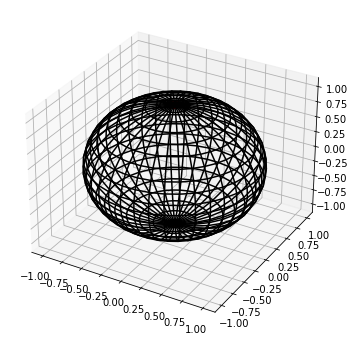

In [94]:
print('\nNematic Z :\n')
# Orientations
orts = get_iso_orientations(1000,cfg='NemZ')
plot3(orts)

# Get nematic Q tensor
Q = calc_nematic_tensor(orts)
print('Nematic Tensor Q:\n {}\n'.format(Q))

# Get eigenvalues and eigenvectors
w,v = np.linalg.eig( Q)
print('EigenVal <---> EigenVec :')
for idx in np.arange(w.shape[0]):
    print('{0:1.4f} <---> {1}'.format(w[idx], v[:,idx]))
    
# Nematic order S
cosTheta = orts[:,-1] # theta is angle between z-axis and rod orientation
S = np.mean( (3/2)*(cosTheta**2 - (1/3)) )
print('\nNematic order S = {}'.format(S))